In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Local Modules
from utilities import load_json
import pkg_1a
import pkg_1b

import augmentation
from preprocessing import get_dataset
from utilities import save_npy_v2, show_dataset
import statistics


In [3]:
PKG_1_PARAMS = load_json("pkg_1_config.json")

In [4]:
# pkg_1a
img_paths, ann_paths = pkg_1a.main(PKG_1_PARAMS)
# pkg_1b
image_db, annot_db = pkg_1b.main(PKG_1_PARAMS)

100%|██████████| 98/98 [00:33<00:00,  2.89it/s]


In [5]:
OUTPUT_PATH = "C:/Users/josep/Documents/work/crate_classifier/outputs/images_augmented"

In [6]:
class_to_gen = [0, 1, 2, 3, 4, 5, 6, 7, 8]

In [7]:
def gen_aug_data(image_db, annot_db, class_to_gen, num_gen=100, r_state=0, num_exp=3):
    class_selected = [f"class_{i}" for i in class_to_gen]
    
    img_sel = []
    ann_sel = []

    # Add class weightage here
    for img_class in class_selected:
        img_files = image_db[img_class]
        ann_files = annot_db[img_class]

        img_sel += img_files
        ann_sel += ann_files

    aug_obj = augmentation.Augmenter(PKG_1_PARAMS, img_sel, ann_sel, out_dir= OUTPUT_PATH)

    aug_img, aug_ann = aug_obj.generate_aug(num_gen=num_gen, write_img=True)

    return aug_img, aug_ann

In [8]:
aug_img, aug_ann= gen_aug_data(image_db, annot_db, class_to_gen, num_gen=100)

100%|██████████| 100/100 [00:14<00:00,  6.69it/s]


In [9]:
# img_sel = image_db["class_1"]
# ann_sel = annot_db["class_1"]

In [10]:
# aug_obj = augmentation.Augmenter(PKG_1_PARAMS, img_sel, ann_sel, out_dir= OUTPUT_PATH)

In [11]:
# aug_img, aug_ann = aug_obj.generate_aug(num_gen=10, write_img=True)

In [12]:
print(f"Img array shape: {aug_img.shape}")
print(f"Ann array shape: {aug_ann.shape}")

Img array shape: (100, 128, 128, 9)
Ann array shape: (100, 128, 128, 1)


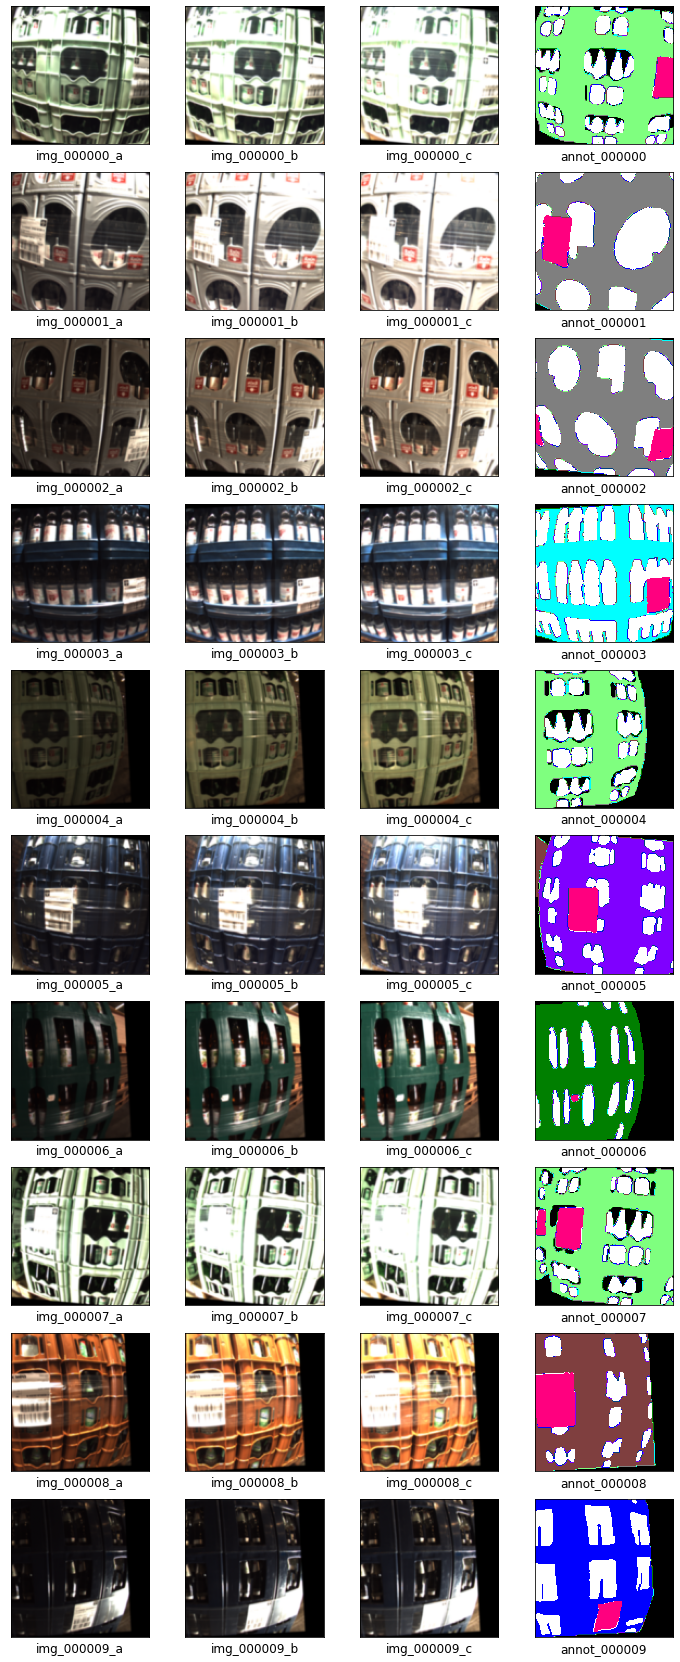

In [18]:
show_dataset(aug_img, aug_ann, 10, num_exp=3, num_class=10)

In [14]:
save_npy_v2(aug_img, Path(OUTPUT_PATH)/"dataset_images_aug")
save_npy_v2(aug_ann, Path(OUTPUT_PATH)/"dataset_annots_aug")


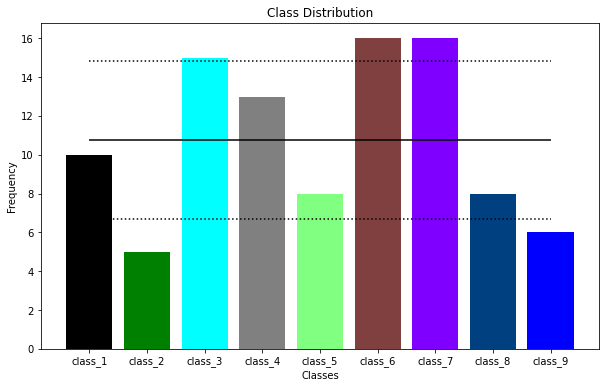

In [15]:
annots = aug_ann
statistics.show_class_dist(annots)

In [16]:
# def main(PKG_1_PARAMS=None):
#     # "C:/Users/josep/Documents/work/crate_classifier_dev_v2/images/factory_images_annotated"
#     #"C:/Users/josep/Documents/work/crate_classifier_dev_v2/images/img_3_sample_train"
#     if PKG_1_PARAMS is None:
#         PKG_1_PARAMS = {
#             "src_dir": "C:/Users/josep/Documents/work/crate_classifier_dev_v2/images/img_3_sample_train",
#             "img_src_shape": (964, 1292),
#             "net_in_shape": (128, 128),
#             "num_exp": 3,
#             "num_classes": 20,
#             "bg_class_id": [0, 9, 10],
#             "cls_thres": 0.85,
#             }

#     # pkg_1a
#     img_paths, ann_paths = pkg_1a.main(PKG_1_PARAMS)
#     # pkg_1b
#     image_db, annot_db = sort_by_class(img_paths, ann_paths, PKG_1_PARAMS)

#     return image_db, annot_db

In [17]:
# if __name__ == "__main__":
#     image_db, annot_db = main()
#     print("img_paths['class_1'] sample:\n", image_db["class_1"][:4])
#     print("ann_paths['class_1'] sample:\n", annot_db["class_1"][:4])